In [35]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Let's first solve the conventional SIR w/this method 

In [38]:
def solve_csir(beta,gamma,N,I0,R0,tf,dt):
    #solves sir conventional model given parameters + initial conditions + tfinal + dt
    n = int((tf/dt) + 1) #number of steps
    S0 = N - I0 - R0
    t = [] #times storage
    S = [] #susceptibles storage
    I = [] #infected storage
    R = [] #recovered storage
    #initial time + initial conditions
    t.append(0)
    S.append(S0)
    I.append(I0)
    R.append(R0)
    #now we do the euler step thing
    for j in range(n):
        sj = S[j] + dt*(-(beta/N) * S[j] * I[j])
        ij = I[j] + dt*((beta/N) * S[j] * I[j] - gamma * I[j])
        rj = R[j] + dt*(gamma * I[j])
        tj = (j+1)*dt
        t.append(tj)
        S.append(sj)
        I.append(ij)
        R.append(rj)
    #we cast everything to numpy arrays
    t = np.array(t)
    S = np.array(S)
    I = np.array(I)
    R = np.array(R)
    #now we plot the results of the sir model
    fig = plt.figure()
    ax = fig.add_subplot(111, axisbelow=True)
    plt.title('SIR común')
    ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number (1000s)')
    ax.set_ylim(0,1.2)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()
    n_t = -np.diff(S)
    n_t = np.hstack((0,n_t))
    n_t = n_t.astype(int)
    new_cases_per_day = np.copy(n_t)
    prox_dia = n_t.shape[0]
    a = np.zeros(6) + 1.0
    aux = np.zeros(1)
    i = 0
    while i < 4: #completing until the day t+4 bc im gonna need it later for averaging in 7 days
        aux = np.mean(n_t[prox_dia-7:])
        n_t  = np.hstack((n_t,aux)) #extending n_t up to day t+1
        i= i +1
    r_t = np.zeros(n_t.shape,dtype=float) #here we will store the rt
    dias_aux = np.arange(0,prox_dia+3)
    for i in dias_aux[dias_aux>=6]:
        aux = a[0]*n_t[i-6] + a[1]*n_t[i-5] + a[2]*n_t[i-4] #denominator of the r_t expression
        if(aux==0):
            aux = 1 #the first cases in which the denominator is == 0
        r_t[i] = min(((a[3]*n_t[i-1] + a[4]*n_t[i] + a[5]*n_t[i+1])/(aux)),4) #the rest of the days with limit value
    r_t_seven = np.zeros(prox_dia) #real values for index>=9
    i = 9
    while i < prox_dia:
        r_t_seven[i] = np.mean(r_t[i-3:i+4])
        i = i+1
    plt.title('SIR modificado')
    plt.plot(r_t_seven[9:])
    plt.axhline(y=1,c='r')
    plt.xlabel('Time/days')
    plt.ylabel('R7')
    plt.show()

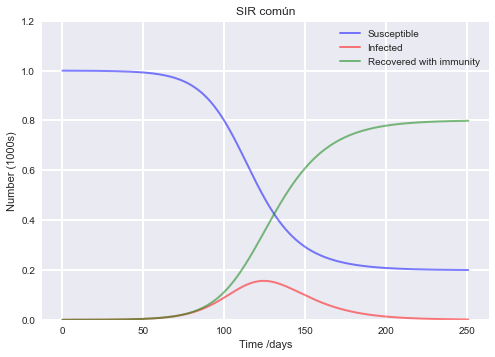

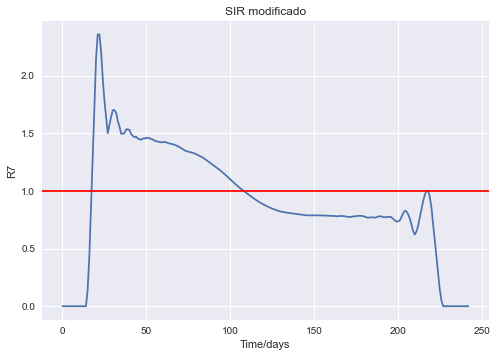

In [39]:
solve_csir(0.15, 0.075,10000,1,0,250,1)

# Now let's move onto the modified model without a time delay

In [40]:
def solve_msir1(beta0,gamma,alpha,N,I0,R0,A0,tf,dt):
    #solves sir modified sir models without a time delay for now
    n = int((tf/dt) + 1) #number of steps
    S0 = N - I0 - R0
    t = [] #times storage
    S = [] #susceptibles storage
    I = [] #infected storage
    R = [] #recovered storage
    A = [] #new A variable storage (which is dI/dt)
    #initial time + initial conditions
    t.append(0)
    S.append(S0)
    I.append(I0)
    R.append(R0)
    A.append(A0)
    #now we do the euler step thing
    for j in range(n):
        sj = S[j] + dt*((-(beta0 - A[j]*alpha)* S[j] * I[j])/N) #modificado
        ij = I[j] + dt*(A[j]) #modified
        rj = R[j] + dt*(gamma * I[j]) #modified
        tj = (j+1)*dt #the same as before, as it should be
        #auxiliary/complementary calculations
        div = 1 + alpha*S[j]*(I[j]/N)
        t1 = -S[j]*(I[j]/N)*(I[j]/N)*((beta0 - A[j]*alpha)**2)
        t2 = (beta0 - A[j]*alpha)*S[j]*(A[j]/N)
        t3 = -gamma*A[j]
        #calculation of value of aj
        aj = A[j] + ((1/div) * (t1 + t2 + t3))*dt 
        t.append(tj)
        S.append(sj)
        I.append(ij)
        R.append(rj)
        A.append(aj)
    #we cast everything to numpy arrays
    t = np.array(t)
    S = np.array(S)
    I = np.array(I)
    R = np.array(R)
    #now we plot the results of the sir model
    fig = plt.figure()
    ax = fig.add_subplot(111, axisbelow=True)
    plt.title('SIR modificado 1')
    ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number (1000s)')
    ax.set_ylim(0,1.2)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()
    n_t = -np.diff(S)
    n_t = np.hstack((0,n_t))
    n_t = n_t.astype(int)
    new_cases_per_day = np.copy(n_t)
    prox_dia = n_t.shape[0]
    a = np.zeros(6) + 1.0
    aux = np.zeros(1)
    i = 0
    while i < 4: #completing until the day t+4 bc im gonna need it later for averaging in 7 days
        aux = np.mean(n_t[prox_dia-7:])
        n_t  = np.hstack((n_t,aux)) #extending n_t up to day t+1
        i= i +1
    r_t = np.zeros(n_t.shape,dtype=float) #here we will store the rt
    dias_aux = np.arange(0,prox_dia+3)
    for i in dias_aux[dias_aux>=6]:
        aux = a[0]*n_t[i-6] + a[1]*n_t[i-5] + a[2]*n_t[i-4] #denominator of the r_t expression
        if(aux==0):
            aux = 1 #the first cases in which the denominator is == 0
        r_t[i] = min(((a[3]*n_t[i-1] + a[4]*n_t[i] + a[5]*n_t[i+1])/(aux)),4) #the rest of the days with limit value
    r_t_seven = np.zeros(prox_dia) #real values for index>=9
    i = 9
    while i < prox_dia:
        r_t_seven[i] = np.mean(r_t[i-3:i+4])
        i = i+1
    plt.title('SIR modificado')
    plt.plot(r_t_seven[9:])
    plt.axhline(y=1,c='r')
    plt.xlabel('Time/days')
    plt.ylabel('R7')
    plt.show()

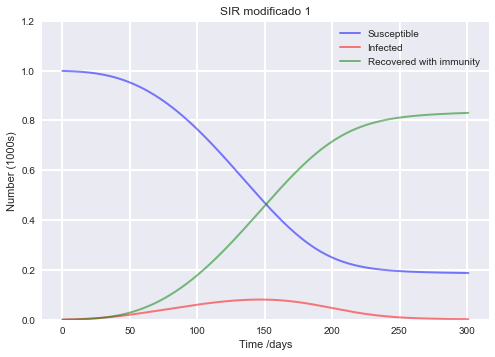

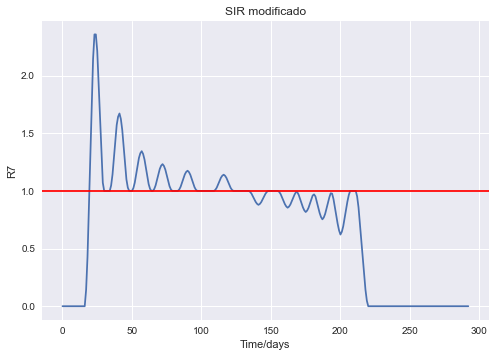

In [41]:
solve_msir1(0.15, 0.075,0.05,1000,1,0,0.1,300,1)

# Now let's try to solve the delay version of this one

In [42]:
def solve_msir2(beta0,gamma,alpha,N,I0,R0,A0,delay,tf,dt):
    #solves sir modified sir models without a time delay for now
    n = int((tf/dt) + 1) #number of steps
    S0 = N - I0 - R0
    t = [] #times storage
    S = [] #susceptibles storage
    I = [] #infected storage
    R = [] #recovered storage
    A = [] #A variable storage
    dA = [] #new variable which is storing dA/dt basically
    for j in range(delay-1):
        t.append(0)
        S.append(S0)
        I.append(I0)
        R.append(R0)
        A.append(A0)
        dA.append(0)
    t.append(0)
    S.append(S0)
    I.append(I0)
    R.append(R0)
    A.append(A0)
    dA.append(0)
    #now we do the euler step thing
    for j in np.arange(delay-1,n+delay):
        sj = S[j] + dt*((-(beta0 - A[j-delay]*alpha)* S[j] * I[j])/N) #modified w/delay
        ij = I[j] + dt*(A[j]) #modified w/delay
        rj = R[j] + dt*(gamma * I[j]) #modified w/delay
        tj = (j+1)*dt #the same as before, as it should be
        #auxiliary/complementary calculations
        t1 = -S[j]*(I[j]/N)*(I[j]/N)*((beta0 - A[j-delay]*alpha)**2) 
        t2 = (beta0 - A[j-delay]*alpha)*S[j]*(A[j]/N) #este esta ok tambien
        t3 = -gamma*A[j] #este esta ok
        t4 = -alpha*((S[j]*I[j])/(N))*(dA[j-delay])
        #calculation of value of aj
        aj = A[j] + ((t1 + t2 + t3 + t4))*dt 
        t.append(tj)
        S.append(sj)
        I.append(ij)
        R.append(rj)
        A.append(aj)
        dA.append(t1+t2+t3+t4)
    #we cast everything to numpy arrays
    t = np.array(t)
    S = np.array(S)
    I = np.array(I)
    R = np.array(R)
    #now we plot the results of the sir model
    fig = plt.figure()
    ax = fig.add_subplot(111, axisbelow=True)
    plt.title('SIR modificado 2')
    ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number (1000s)')
    #ax.set_ylim(0,1.2)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()
    n_t = -np.diff(S)
    n_t = np.hstack((0,n_t))
    n_t = n_t.astype(int)
    new_cases_per_day = np.copy(n_t)
    prox_dia = n_t.shape[0]
    a = np.zeros(6) + 1.0
    aux = np.zeros(1)
    i = 0
    while i < 4: #completing until the day t+4 bc im gonna need it later for averaging in 7 days
        aux = np.mean(n_t[prox_dia-7:])
        n_t  = np.hstack((n_t,aux)) #extending n_t up to day t+1
        i= i +1
    r_t = np.zeros(n_t.shape,dtype=float) #here we will store the rt
    dias_aux = np.arange(0,prox_dia+3)
    for i in dias_aux[dias_aux>=6]:
        aux = a[0]*n_t[i-6] + a[1]*n_t[i-5] + a[2]*n_t[i-4] #denominator of the r_t expression
        if(aux==0):
            aux = 1 #the first cases in which the denominator is == 0
        r_t[i] = min(((a[3]*n_t[i-1] + a[4]*n_t[i] + a[5]*n_t[i+1])/(aux)),4) #the rest of the days with limit value
    r_t_seven = np.zeros(prox_dia) #real values for index>=9
    i = 9
    while i < prox_dia:
        r_t_seven[i] = np.mean(r_t[i-3:i+4])
        i = i+1
    plt.title('SIR modificado')
    plt.plot(r_t_seven[9:])
    plt.axhline(y=1,c='r')
    plt.xlabel('Time/days')
    plt.ylabel('R7')
    plt.show()
    #now we start with the risk diagram 
    a_t = np.zeros(prox_dia) #real values for index >= 13
    i = 13
    while i < prox_dia:
        a_t[i] = np.sum(n_t[i-13:i+1]) 
        i = i+1
    a_t = a_t * (100000/n) #where n is the population of the simulation
    riesgo = a_t * r_t_seven
    plt.title('SIR modificado')
    plt.plot(a_t[13:],r_t_seven[13:],'-or',markersize=5)
    plt.show()

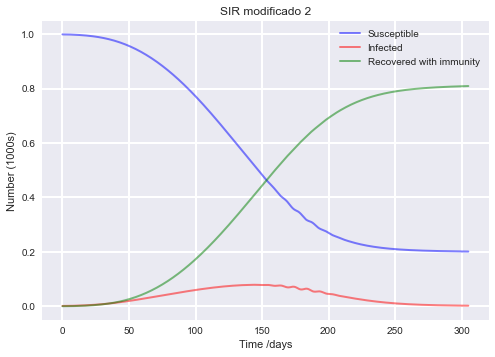

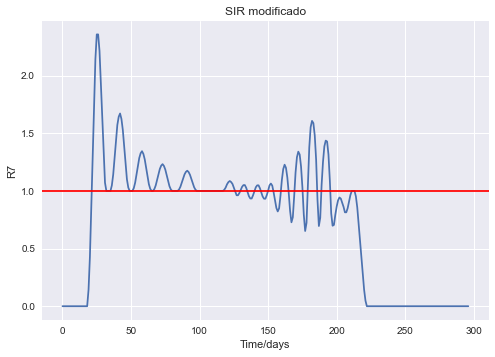

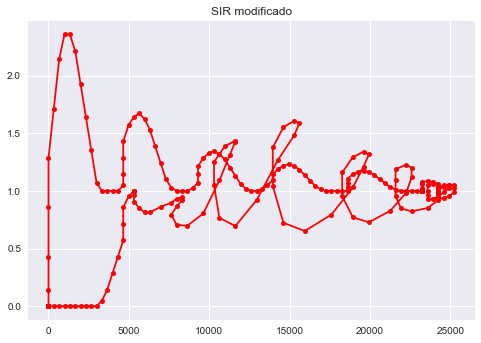

In [46]:
solve_msir2(0.15, 0.075,0.05,1000,1,0,0.1,4,300,1)
#cambiando el delay se observan otras cosas!!! (cambiarlo a dos x ejemplo se dejan de ver los loops)

In [10]:
#